In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://www.amazon.in/s?k=mobiles+5g&sprefix=mobiles+%2Caps%2C2276&ref=nb_sb_ss_ts-doa-p_6_8"

In [3]:
headerAgent = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'}
page = requests.get(url,headers=headerAgent)

In [4]:
df = pd.DataFrame({'Link':[''],'Description':[''],'Price':[''],'Rating':['']})

count = 0
while count < 20:
    soup = BeautifulSoup(page.text,'lxml')
    product_details = soup.find_all('div',class_='sg-col sg-col-4-of-12 sg-col-8-of-16 sg-col-12-of-20 sg-col-12-of-24 s-list-col-right')

    for details in product_details:
        try:

            link = details.find('a',class_='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal').get('href')
            main_link = 'https://www.amazon.in'
            full_link = main_link + link

        except:
             full_link = 'NA'
        try:
            description = details.find('span',class_='a-size-medium a-color-base a-text-normal').text

        except:
            description = 'NA'
        try: 
            price = details.find('span',class_='a-price-whole').text

        except:
            price = 'NA'
        try:
            ratings = details.find('span',class_='a-icon-alt').text
        except:
            ratings = 'NA'
        df = df.append({'Link':full_link,'Description':description,'Price':price,'Rating':ratings},ignore_index=True) 
    try:
        next_page = soup.find('a',class_='s-pagination-item s-pagination-next s-pagination-button s-pagination-separator').get('href')
        page = requests.get('https://www.amazon.in' + next_page)
    except:
        pass
    count = count + 1


In [5]:
df.shape

(21, 4)

In [6]:
df.head()

,Link,Description,Price,Rating
0,,,,
1,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,"Redmi 11 Prime 5G (Chrome Silver, 4GB RAM 64GB...","12,999",3.9 out of 5 stars
2,https://www.amazon.in/OPPO-Fluid-Black-128GB-S...,"OPPO A74 5G (Fluid Black, 6GB RAM, 128GB Stora...","15,490",4.2 out of 5 stars
3,https://www.amazon.in/Redmi-Chrome-Silver-Dime...,"Redmi 11 Prime 5G (Chrome Silver, 4GB RAM 64GB...","12,999",3.9 out of 5 stars
4,https://www.amazon.in/Redmi-Thunder-Storage-Di...,"Redmi 11 Prime 5G (Thunder Black, 4GB RAM, 64G...","12,999",3.9 out of 5 stars


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Link         21 non-null     object
 1   Description  21 non-null     object
 2   Price        21 non-null     object
 3   Rating       21 non-null     object
dtypes: object(4)
memory usage: 800.0+ bytes


In [8]:
df = df.iloc[1:]

In [9]:
import string
string.punctuation
def remove_punctuation(data):
    data = ''.join([i for i in data if i not in string.punctuation])
    return data
df['Price'] = df['Price'].apply(lambda x: remove_punctuation(x)) 
df['Description'] = df['Description'].apply(lambda x: remove_punctuation(x)) 

In [10]:
df['Price'] = df['Price'].astype('int')

In [11]:
df['Price']

1      12999
2      15490
3      12999
4      12999
5      11999
6      15490
7      13499
8      14999
9      18999
10     15999
11    132990
12    114900
13     10999
14     14999
15     12999
16     18999
17     29999
18     16999
19     15499
20    104900
Name: Price, dtype: int32

In [12]:
df.head()

,Link,Description,Price,Rating
1,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Redmi 11 Prime 5G Chrome Silver 4GB RAM 64GB R...,12999,3.9 out of 5 stars
2,https://www.amazon.in/OPPO-Fluid-Black-128GB-S...,OPPO A74 5G Fluid Black 6GB RAM 128GB Storage ...,15490,4.2 out of 5 stars
3,https://www.amazon.in/Redmi-Chrome-Silver-Dime...,Redmi 11 Prime 5G Chrome Silver 4GB RAM 64GB R...,12999,3.9 out of 5 stars
4,https://www.amazon.in/Redmi-Thunder-Storage-Di...,Redmi 11 Prime 5G Thunder Black 4GB RAM 64GB S...,12999,3.9 out of 5 stars
5,https://www.amazon.in/Samsung-Galaxy-Storage-5...,Samsung Galaxy M13 5G Aqua Green 4GB 64GB Stor...,11999,4.1 out of 5 stars


In [13]:
df['Description'] = df['Description'].apply(lambda x: x.lower())

df['Description'] = df['Description'].replace('[^\w\s]','')

df['Description'] = df['Description'].replace('\d','')

In [14]:
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')

df['Description'] = df['Description'].apply(lambda x: ' '.join(i for i in x.split() if i not in sw))
df.head()

,Link,Description,Price,Rating
1,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,redmi 11 prime 5g chrome silver 4gb ram 64gb r...,12999,3.9 out of 5 stars
2,https://www.amazon.in/OPPO-Fluid-Black-128GB-S...,oppo a74 5g fluid black 6gb ram 128gb storage ...,15490,4.2 out of 5 stars
3,https://www.amazon.in/Redmi-Chrome-Silver-Dime...,redmi 11 prime 5g chrome silver 4gb ram 64gb r...,12999,3.9 out of 5 stars
4,https://www.amazon.in/Redmi-Thunder-Storage-Di...,redmi 11 prime 5g thunder black 4gb ram 64gb s...,12999,3.9 out of 5 stars
5,https://www.amazon.in/Samsung-Galaxy-Storage-5...,samsung galaxy m13 5g aqua green 4gb 64gb stor...,11999,4.1 out of 5 stars


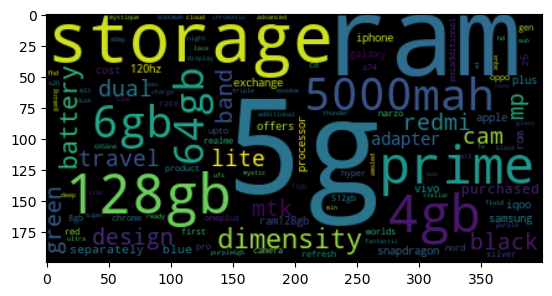

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(i for i in df['Description'])

word_cloud = WordCloud(collocations=False,background_color='black').generate(text)
plt.imshow(word_cloud,interpolation='bilinear')
plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

tf = CountVectorizer()
x = tf.fit_transform(df['Description'])
y = df['Price']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
print("Root Mean Squared Error for the Model is ",math.sqrt(mean_squared_error(y_pred,y_test)))
print("Mean Squared Error for the Model is ",mean_squared_error(y_pred,y_test))
print("Absolute Mean Error for the Model is ",mean_absolute_error(y_pred,y_test))

Root Mean Squared Error for the Model is  11896.845827030602
Mean Squared Error for the Model is  141534940.63213545
Absolute Mean Error for the Model is  11270.369843239743


In [30]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor()
dc.fit(x_train,y_train)
y_pred_dc = dc.predict(x_test)

In [31]:
print("Root Mean Squared Error for the Model is ",math.sqrt(mean_squared_error(y_pred_dc,y_test)))
print("Mean Squared Error for the Model is ",mean_squared_error(y_pred_dc,y_test))
print("Absolute Mean Error for the Model is ",mean_absolute_error(y_pred_dc,y_test))

Root Mean Squared Error for the Model is  1120.062721458044
Mean Squared Error for the Model is  1254540.5
Absolute Mean Error for the Model is  1004.5
